# Design 2

In [1]:
from plotly import graph_objects as go
from neurophotonics.probe.probely import Probe, ProbeGroup

Connecting root@localhost:3306


## 1. Design Definition

In [2]:
def design2(save=False, output="Design2.csv"):
    # Create 10 probes at 0, 0, 0
    PG = ProbeGroup(
        [
            Probe(
                probe_dimensions=[1200, 150, 1300],
                n_e_box=[5, 60],
                e_box_length=10,
                e_box_sep=10,
                e_box_vertical_margin=5,
                e_box_horizontal_margin=30,
                n_d_box=[22, 240],
                d_box_length=5,
                d_box_sep=0,
                d_box_vertical_margin=0,
                d_box_horizontal_margin=25,
                name="P" + str(i),
            )
            for i in range(10)
        ]
    )

    # Position the Probes
    for i, probe in enumerate(PG.probes):
        if not i % 2:
            probe.rotate("z", 180)  # Around the origin (0, 0, 0)
            probe.translate([-150.0 * len(PG.probes) / 2 + 0.5 + i * 150.0, 75, 0])
        else:
            probe.translate([-150.0 * len(PG.probes) / 2 + 0.5 + i * 150.0, -75, 0])

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG

In [3]:
D2 = design2()

## 2. Co-integrated E- and D-pixel arrays

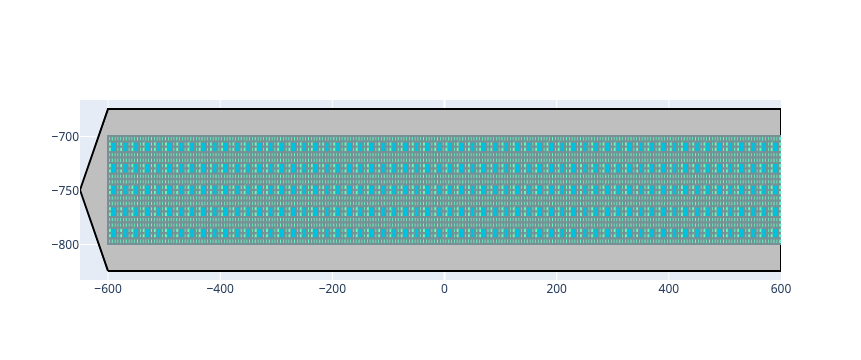

In [4]:
fig = go.Figure()
D2.probes[0].plot_2d(show=True, fig=fig)

## 3. 10-Probe Configuration in 3D

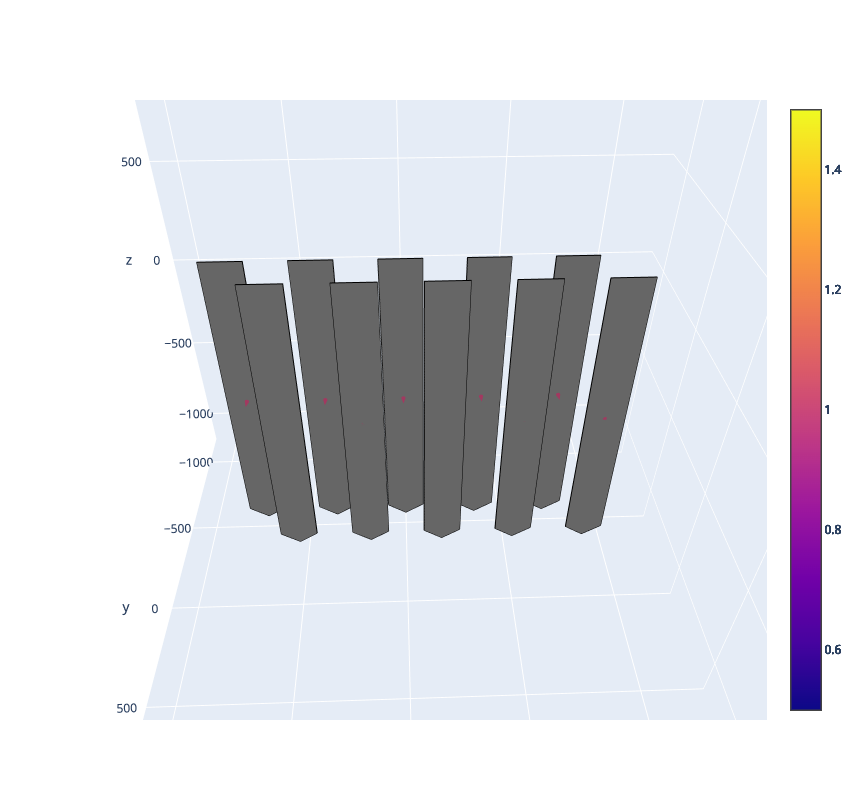

In [5]:
# Note: Showing D- and E-pixels is possible but very memory intensive; hence, it is not suggested.
fig = go.Figure()
D2.plot_shanks(show=False, d_pixels=False, e_pixels=False, cone=True, fig=fig)
fig.update_layout(autosize=False, width=800, height=800)

In [8]:
print(f"Total number of E-pixels: {sum(len(probe.e_pixels) for probe in D2.probes)}")
print(f"Total number of D-pixels: {sum(len(probe.d_pixels) for probe in D2.probes)}")

Total number of E-pixels: 3000
Total number of D-pixels: 36000
